<a href="https://colab.research.google.com/github/Aryan-Tatiwar/TensorFlow_DeepLearning/blob/main/01_Neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks In TensorFlow

There are many definations for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combinations of variables, even shorter.....predicting a number.



In [ ]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.19.0


# Creating data to view and fit

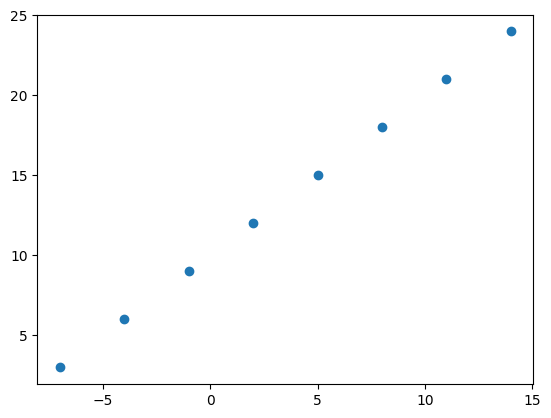

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X,y)

In [ ]:
y == X +10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output shapes

In [ ]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroon", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroon', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X.ndim, y.ndim

(1, 1)

In [ ]:
X[0].ndim, y[0].ndim

(0, 0)

In [ ]:
X[0], y[0]

(np.float64(-7.0), np.float64(3.0))

In [ ]:
# Turn our numpy arrays into tensors with dtype float32
X = np.array(X).reshape(-1,1)
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([1]), TensorShape([]))

# Steps in modelling with Tensorflow

1. Creating a model - Define the input and output layers, as well as the hidden layers of a deep learning model.

2. Compiling a model - Define the loss function ( in othetr words, the funcction which tells our model how wrong it is) and the optimizer (tells our model how to improve the pattern its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. Fitting the model - Letting the model find patterns between X and y(features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model using Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])#mae is short form of mean absolute error and SGD stands for Stochastic Gradient Descent

#. Fitting the model
model.fit(X,y, epochs= 5)


Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 12.3025 - mae: 12.3025
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.1700 - mae: 12.1700
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 12.0375 - mae: 12.0375
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.9050 - mae: 11.9050
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.7725 - mae: 11.7725


In [ ]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make prediction using our model
y_pred = model.predict(np.array([[17.0]]))
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


array([[8.841499]], dtype=float32)

In [ ]:
y_pred + 5

array([[13.841499]], dtype=float32)

# Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, chnage the activation function of each layer.

2. **Compiling the model** - here we might change the optimization function or perhaps the **learning rate** of the said optimization function.

3. **Fitting a model** - here we might fit  amodel for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

#1. Create a model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step - loss: 8.7240 - mae: 8.7240
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.5915 - mae: 8.5915
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.4590 - mae: 8.4590
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.3265 - mae: 8.3265
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.1940 - mae: 8.1940
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 8.0615 - mae: 8.0615
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 7.9290 - mae: 7.9290
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.7965 - mae: 7.7965
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 7.6640 - mae: 7.6640
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.5315 - mae: 7.5315
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.4250 - mae: 7.4250
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 7.4194 - mae: 7.4194
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/st

In [ ]:
# Remind ourselves of the data
X,y

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved
model.predict(np.array([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[29.922676]], dtype=float32)

In [ ]:
# Changing the optimizer to check if it enhances predictiion even further
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics = ["mae"]
              )

model.fit(X,y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 700ms/step - loss: 14.1200 - mae: 14.1200
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.6700 - mae: 13.6700
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 13.2200 - mae: 13.2200
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.7700 - mae: 12.7700
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 12.3200 - mae: 12.3200
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.8700 - mae: 11.8700
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 11.4200 - mae: 11.4200
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 10.9700 - mae: 10.9700
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 10.5200 - mae: 10.5200
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 10.0700 - mae: 10.0700
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.6200 - mae: 9.6200
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.1700 - mae: 9.1700
Epoch 13/100
1/1 ━━━━━━━━━━━

In [ ]:
model.predict(np.array([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[27.219242]], dtype=float32)

In [ ]:
# Adding more layers to check if it improves the model's accuracy

#1. Create the model with one extra hidden layer having 100 neurons
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation= "relu"),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"]
              )

#3. Fit the model
model.fit(X,y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step - loss: 13.4984 - mae: 13.4984
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 12.8952 - mae: 12.8952
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 12.2922 - mae: 12.2922
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 11.7013 - mae: 11.7013
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 11.1061 - mae: 11.1061
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 10.4916 - mae: 10.4916
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 9.8578 - mae: 9.8578
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 9.1979 - mae: 9.1979
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.5561 - mae: 8.5561
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 7.8836 - mae: 7.8836
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.1638 - mae: 7.1638
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 6.3905 - mae: 6.3905
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━

In [ ]:
model.predict(np.array([[17.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


array([[31.906425]], dtype=float32)

# Evaluating a model

In practice a typical workflow you'll go through when building a neural network is:

```
Build a model -> fit it -> evaulate it -> tweak a model -> fit it -> evaulate it -> tweak a model........
```


When it comes to evaluation... There are 3 words one must memorize:
> "Visualize,visualize,visualize

It's good idea to visualize:
* The data - what data are we working with> What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth.

In [ ]:
# Make a big dataset
X = tf.range(-100,100,4)

X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for dataset
y = X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

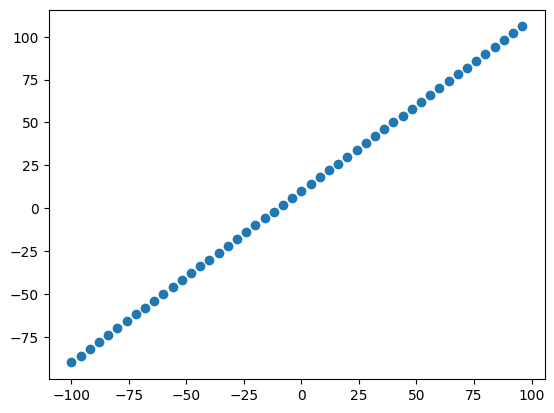

In [ ]:
# Visualize the data

plt.scatter(X,y)

# The 3 sets.........

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets turned on this data, which is typically 10-15% of data available.
* **Test Data** - the model gets evaluated on this data to testwhat it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
X_reshaped = tf.reshape(X, (-1,1))

In [ ]:
# Split the data into train and test sets
X_train = X_reshaped[:40] # first 40 are training samples (80% of the data)
X_test = X_reshaped[40:] # last 10 are test samples (20% of the data)

y_train = y[:40]
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

In [ ]:
len(y_train), len(y_test)

(40, 10)

# Visualize our data

Now, we've got our data in training and tests sets..... let's visualize it again!

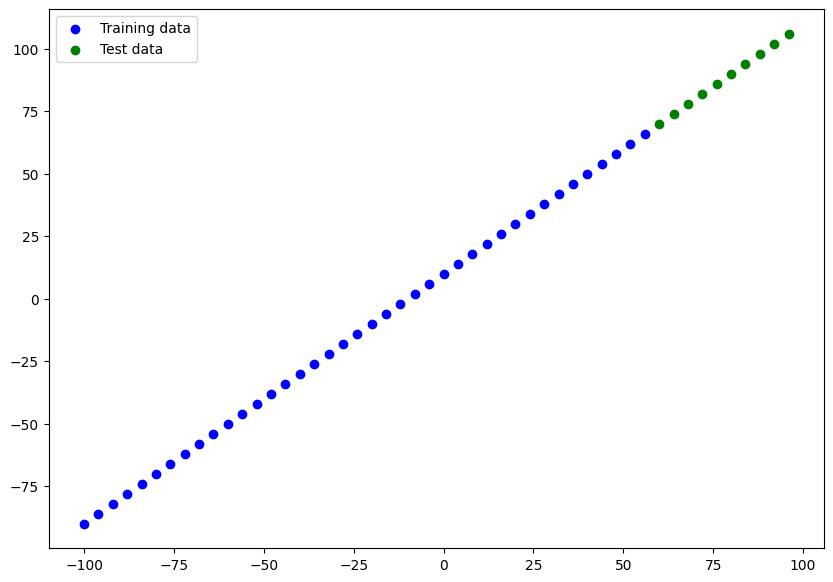

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")
# Show legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

#1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss= tf.keras.losses.mae,
               optimizer = tf.keras.optimizers.SGD(),
               metrics = ["mae"]
               )

#3. Fit the model
#model.fit(X_train, y_train, epochs=100)

# Visualizing the model

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X[0],y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# Let's build model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,), name ="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name = "one_of_many")

# Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "one_of_many"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parametrs aren't updated  during training(this is typical when you bring in already lernt patterns or parameters from other model during **transfer learning**)

In [ ]:
model

<Sequential name=one_of_many, built=True>

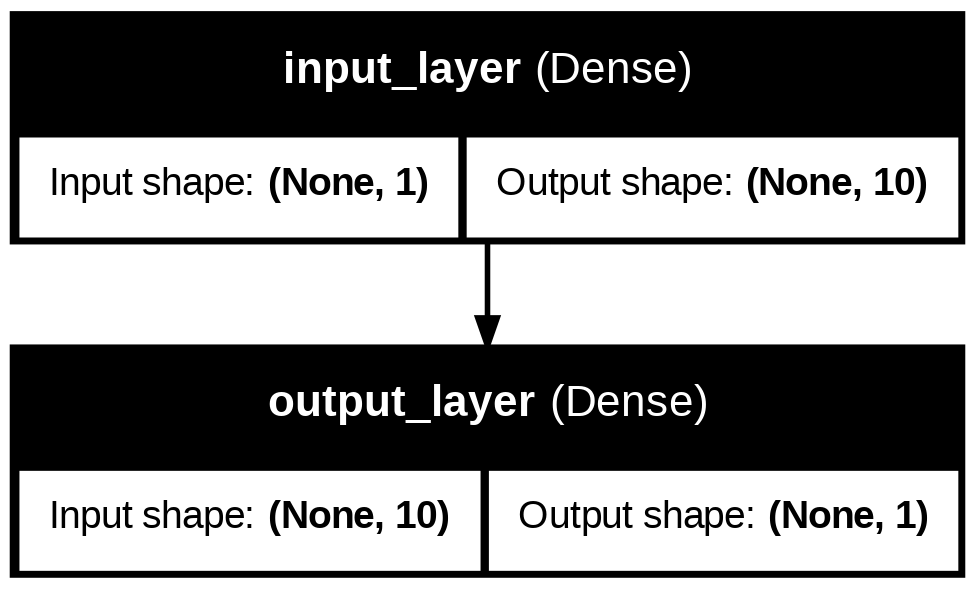

In [ ]:
from tensorflow.keras.utils import  plot_model

plot_model(model=model,
           show_shapes=True,
           show_layer_names=True)

# Visualizing our model predictions

To visualize predictions, it's a good idea to plot them against truth labels

Often you'll see this in the form of `y_test` or `y_train` versus `y_pred` (ground truth versus your model's performance)

In [ ]:
# Make some predictions
y_preds = model.predict(X_test)
y_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


array([[1.1831551],
       [1.2620296],
       [1.3409042],
       [1.4197845],
       [1.4986553],
       [1.5775375],
       [1.6564178],
       [1.7352905],
       [1.8141632],
       [1.8930397]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Creating a plotting function

def plot_predictions(train_data = X_train, train_labels = y_train, test_data = X_test, test_labels = y_test, predictions = y_preds):
  """
  Plots training data, test data and compares predictions.
  """

  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Test data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label = " Predictions")
  # Show legend
  plt.legend();

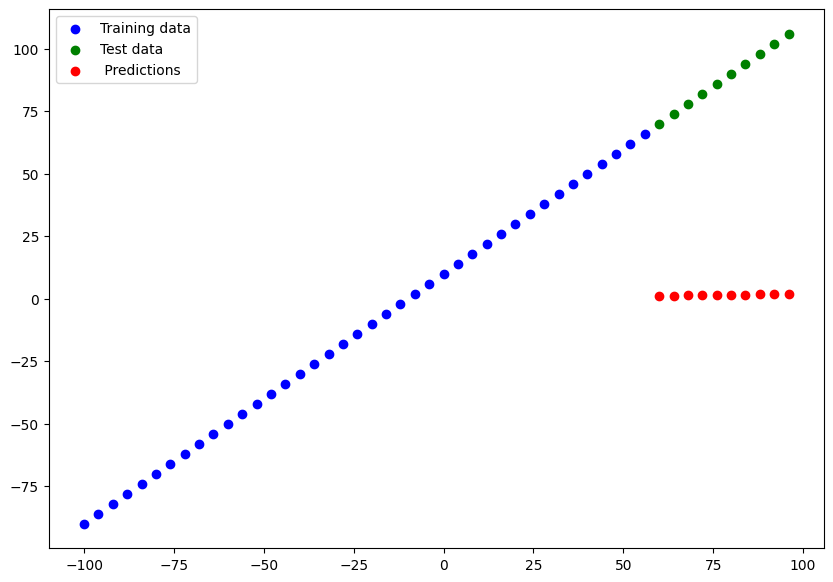

In [ ]:
plot_predictions()

# Evaluating our model's predictions with regression evaluation metrics

Depending onm the problem you are working on, there will be  different evaluation metrics to evaluate our model's performance

Since,we are working on a regression, two of the main metrics:

* MAE - Mean absolute error, "on average, how wrong is each of my model's predictions"

* MSE - Mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

In [ ]:
tf.squeeze(y_pred)

In [ ]:
# Calculate the mae
mae = tf.metrics.mae(y_true = y_test, y_pred = tf.squeeze(y_pred))

mae

In [ ]:
# Calculate the mse
mse = tf.metrics.mse(y_true = y_test, y_pred = tf.squeeze(y_pred))

mse

In [ ]:
# Calculate the huber
huber = tf.keras.losses.huber(y_true = y_test, y_pred = tf.squeeze(y_pred))

huber

In [ ]:
# Make functions to reuse mae and mse
def mae(y_true, y_pred):
  return tf.metrics.mae(y_true= y_true,
                        y_pred = tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mse(y_true = y_true,
                        y_pred = tf.squeeze(y_pred))

# Experiments to improve our model

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

2. Make your model larger ( use a more complex model ) - This might come in the form of more layetrs or more hiodden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in data.


Let's  do 3 modelling expts:

1. `model_1` - same as model, 1 layer, trained for 100 epochs

2. `model_2` - 2 layers, trained for 100 epochs

3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set frandom seed
tf.random.set_seed(42)

#1. Create a model

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])

#3. Fit the model
model_1.fit(X_train, y_train, epochs = 100)

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions = y_preds_1)

In [ ]:
tf.constant(y_preds_1)

In [ ]:
tf.squeeze(y_preds_1) # Removes that one extra dimension

In [ ]:
# Calculate the model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

Build `model_2`

In [ ]:
tf.random.set_seed(42)

# Creating a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_2.compile(loss= tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mse"])

# Fit the model
model_2.fit(X_train, y_train, epochs=100)

In [ ]:
# Make and plot predictions of model 2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions = y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2


Build `model_3`

In [ ]:
# Set random seed
tf.random.set_seed(42)

#1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"]
                )

#3. Fit the model
model_3.fit(X_train, y_train, epochs = 500)

In [ ]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

In [ ]:
# Calculate model 3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

# Compairing the results of our experiments

In [ ]:
# Let's compare model's results using pandas dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results

In [ ]:
model_1.summary()

# Tracking your experiments

one really good habit in ml modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily there are tools to help us

**Resource:** As you build more models, you'll want to lookinto using:

* TensorBoard -  a component of the TensorFlow libtrary to help track modelling experiments.

* Weaights and Biases-  a tool for tracking all of kinds of ml experiments (plugs straight into TensorBoard)

# Saving our models

There are two main formats we can save our model's too:

1. The SaveModel format
2. The HDF% format

In [ ]:
# Save Model using SaveModel format
model_1.save("best_model_SavedModel_format.keras")

In [ ]:
# Save model in HDF5 format
model_1.save("best_model_HDF5_format.h5")

# Loading in saved model

In [ ]:
# Load in the SavedModel format first
loaded_SaveModel_format = tf.keras.models.load_model("/content/best_model_SavedModel_format.keras")
loaded_SaveModel_format.summary()

In [ ]:
model_1.summary()

In [ ]:
# Compare model_1 predictions  with SaveModel format model predictions
model_1_preds = model_1.predict(X_test)
loaded_SaveModel_format_preds = loaded_SaveModel_format.predict(X_test)
model_1_preds == loaded_SaveModel_format_preds

In [ ]:
# Loading using .h5 format
loaded_HDF5_format = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")
loaded_HDF5_format.summary()

In [ ]:
model_1.summary()

In [ ]:
# Check if loaded .h5 model preedictions match model_1 predictions
model_1_preds = model_1.predict(X_test)
loaded_HDF5_format_preds = loaded_HDF5_format.predict(X_test)
model_1_preds == loaded_HDF5_format_preds

## Download a model from Google Colab

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Download using code as given in cell below

In [ ]:
# Download a file using google collab
from google.colab import files

files.download("/content/best_model_SavedModel_format.keras")

In [ ]:
# Save a file from Google Collab to Google Drive
#!cp /content/best_model_SavedModel_format.keras /content/drive/MyDrive/tensorflow

# A larger example

In [ ]:
# Importing libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Read the insuarance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# let's try one hot encode our Dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,False,True,True,False,False,True,False,False
1334,18,31.920,0,2205.98080,True,False,True,False,True,False,False,False
1335,18,36.850,0,1629.83350,True,False,True,False,False,False,True,False
1336,21,25.800,0,2007.94500,True,False,True,False,False,False,False,True


In [ ]:
# Create X and y values (features and labels)
X = insurance_one_hot.drop("charges", axis = 1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [ ]:
y.head()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Build a model
tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([

    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"])

insurance_model.fit(X_train, y_train, epochs = 100)


Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 10081.7451 - mae: 10081.7451
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7655.2056 - mae: 7655.2056
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7587.9248 - mae: 7587.9248
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7352.7251 - mae: 7352.7251
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7880.8213 - mae: 7880.8213
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7306.1475 - mae: 7306.1475
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7730.2085 - mae: 7730.2085
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7681.8218 - mae: 7681.8218
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7447.8696 - mae: 7447.8696
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7354.1865 - mae: 7354.1865
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7329.0615 - mae: 7329.0615
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [ ]:
# Evaluate the model
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - loss: 6595.8550 - mae: 6595.8550


[6369.50439453125, 6369.50439453125]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, np.float64(13346.089736364485))

Right now our model semms to be way off...., let's try imroving its performance

In [ ]:
# Creating 2nd insuarance model, this time adding more layers and using Adam optimizer
tf.random.set_seed(42)

insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_2.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                          metrics = ["mae"])

insurance_model_2.fit(X_train, y_train, epochs = 100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 12677.9658 - mae: 12677.9658
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7574.3950 - mae: 7574.3950
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7234.1245 - mae: 7234.1245
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7031.3335 - mae: 7031.3335
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6760.0098 - mae: 6760.0098
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6433.4844 - mae: 6433.4844
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6266.1396 - mae: 6266.1396
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6136.2090 - mae: 6136.2090
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5999.2827 - mae: 5999.2827
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5818.2837 - mae: 5818.2837
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5570.8369 - mae: 5570.8369
Epoch 12/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/st

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 3212.0212 - mae: 3212.0212


[3160.25244140625, 3160.25244140625]

In [ ]:
# Creating 3rd model, this time training for longer periods and changing the lr

tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model_3.compile(loss = tf.keras.losses.mae,
                          optimizer = tf.keras.optimizers.Adam(learning_rate=0.1),
                          metrics = ["mae"])

history = insurance_model_3.fit(X_train, y_train, epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 9647.8574 - mae: 9647.8574
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6660.6660 - mae: 6660.6660
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5487.4121 - mae: 5487.4121
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4333.4307 - mae: 4333.4307
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4713.0522 - mae: 4713.0522
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4417.9414 - mae: 4417.9414
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4141.6890 - mae: 4141.6890
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4111.4224 - mae: 4111.4224
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3821.6980 - mae: 3821.6980
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3819.8511 - mae: 3819.8511
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3779.8948 - mae: 3779.8948
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

In [ ]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3285.3711 - mae: 3285.3711


[3230.887939453125, 3230.887939453125]

In [ ]:
insurance_model_2.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3212.0212 - mae: 3212.0212 


[3160.25244140625, 3160.25244140625]

Text(0.5, 0, 'epochs')

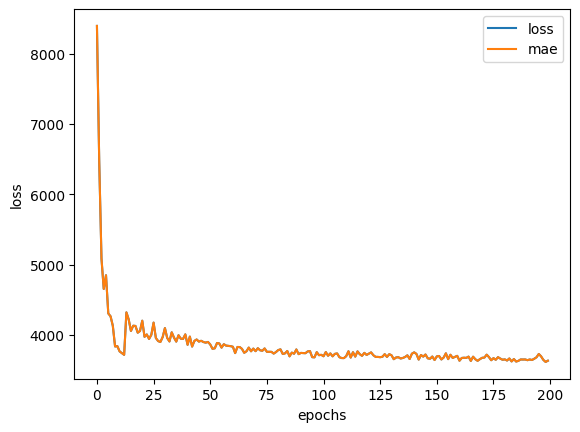

In [ ]:
# Plot history also known as a loss curve or training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question : How long to train the model ?**

There is this method called `EarlyStopping Callback` which is a TensorFlow component you can addd to your model to stop training once it stops improving a certain metric.

# Preprocessing Data(normalization and standardization)

In terms of  scaling values, neural networks tend to prefer normalization.


In [ ]:
# Import required libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read from csv
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow some classes from Scikit-learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform the training and test data with normalization (MinMaxScaler) and one hot encoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# What does our data looks like now
X_train.loc[0]

,0
age,19
sex,female
bmi,27.9
children,0
smoker,yes
region,southwest


In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
# Checking the shapes
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Now our data has been  normalized and one-hot encoded. Now, let's build a neural network model on it and see how it works.

In [ ]:
# Building the neural network model

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model.compile(loss= tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                        metrics = ["mae"]
                        )

insurance_model.fit(X_train_normal, y_train, epochs = 200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 13257.7959 - mae: 13257.7959
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 12143.1914 - mae: 12143.1914
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8442.6748 - mae: 8442.6748
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7600.6094 - mae: 7600.6094
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7144.7837 - mae: 7144.7837
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6557.0723 - mae: 6557.0723
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5696.0815 - mae: 5696.0815
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4512.9141 - mae: 4512.9141
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3726.3215 - mae: 3726.3215
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3638.6340 - mae: 3638.6340
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3627.1638 - mae: 3627.1638
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/

In [ ]:
insurance_model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 3213.1855 - mae: 3213.1855


[3160.73291015625, 3160.73291015625]